<a href="https://colab.research.google.com/github/Ruqyai/IWD20/blob/master/iwd_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tips:

* Enable a GPU in Colab before running this notebook. *Edit -> Notebook settings -> Hardware accelerator -> GPU.* 

* Should you need to reset your environment to a clean state, you can use *Runtime -> Factory reset runtime*.

# IWD 2020: Training Neural Networks with TensorFlow

Welcome! Today, you'll gain hands-on experience training neural networks with TensorFlow. This notebook contains several tutorials and exercises. Your instructor will guide you through the sections you'll explore today. 

If you're new to Deep Learning, this is a *lot* of material to cover in a short workshop. Our goals are to dive in and get started. You'll find educational resources for you to continue learning at the end, and you can complete the sections we don't finish today at home. 

Here's an outline of what we'll cover.

1. You'll train a Deep Neural Network to classify handwritten digits. This is the "hello world" of computer vision, and a great place to begin if you're new to the subject. As an exercise, you'll use a different dataset, and modify the network.

1. Next, you'll train a Convolutional Neural Network to classify images of cats and dogs, using a real-world dataset you read off disk. As an exercise, you'll use data augmentation and dropout to reduce overfitting.

1. If time remains, your instructor will walk you through DeepDream. This is an advanced example that lets you visualize some of the features learned by a CNN.

Okay, let's get started!

[Link to playground.tensorflow.org](http://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.003&regularizationRate=0&noise=0&networkShape=&seed=0.20090&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

# Tutorial: MNIST

Training an image classifier on the MNIST dataset of handwritten digits is considered the "hello world" of computer vision. In this tutorial, you will download the dataset, then train a linear model, a neural network, and a deep neural network to classify it. 

**Key point:** Deep Learning is "code light, but concept heavy". You'll be able to implement a Deep Neural Network in about five lines of code, but the underlying concepts (cross-entropy, softmax, dense layers, etc) normally take a few months to learn. You do need to understand these all today to dive in.

## Import TensorFlow

Let's import TensorFlow. **At the time of writing**, Colab has TensorFlow version 1.x installed by default. TensorFlow 2.x is much easier to use, so let's start with that. To switch to 2.x we'll use the **magic command** below. Note, you can also [install](http://tensorflow.org/install) TensorFlow by using `pip`, but in Colab, the magic command is faster.



![alt text](https://github.com/Ruqyai/IWD20/blob/master/TF2.jpg?raw=true)

In [0]:
#%tensorflow_version 2.x
import tensorflow as tf
print("You are using TensorFlow version", tf.__version__)
if len(tf.config.list_physical_devices('GPU')) > 0:
  print("You have a GPU enabled.")
else:
  print("Enable a GPU before running this notebook.")

You are using TensorFlow version 2.2.0-rc1
You have a GPU enabled.


Colab has a variety of GPU types available (each new  instance is assigned one randomly, depending on availability). To see which type of GPU you have, you can run ```!nvidia-smi``` in a code cell. Some are quite fast!

In [0]:
# In this notebook, we'll use Keras: TensorFlow's user-friendly API to 
# define neural networks. Let's import Keras now.
from tensorflow import keras
import matplotlib.pyplot as plt

## Download the MNIST dataset
MNIST contains 70,000 grayscale images in 10 categories. The images are low resolution (28 by 28 pixels). An important skill in Deep Learning is exploring your dataset, and understanding the format. Let's download MNIST, and explore it now.

In [0]:
dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

There are 60,000 images in the training set:

In [0]:
print(train_images.shape)

(60000, 28, 28)


And 10,000 in the testing set:

In [0]:
print(test_images.shape)

(10000, 28, 28)


Each label is an integer between 0-9:

In [0]:
print(train_labels)

[5 0 4 ... 5 6 8]


## Preprocess the data
The pixel values in the images range between 0 and 255. Let's normalize the values 0 and 1 by dividing all the images by 255. It's important that the training set and the testing set are preprocessed in the same way.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Let's display the first 25 images from the training set, and display the label below each image.

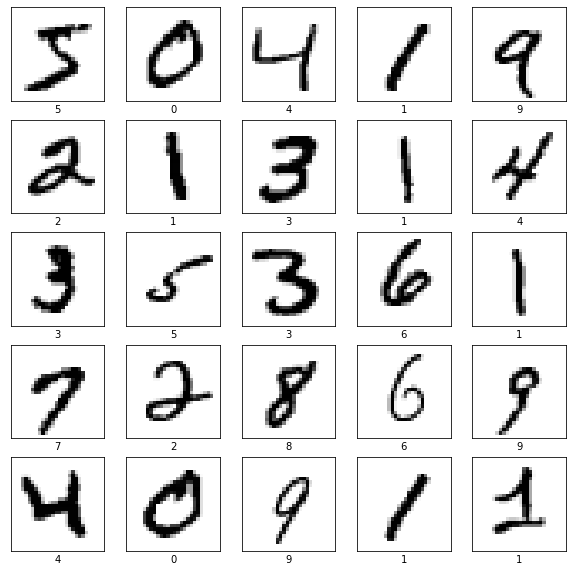

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Create the layers

Neural networks are made up of layers. Here, you'll define the layers, and assemble them into a model. We will start with a single Dense layer. 

### What does a layer do?

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. For example:

- The first layer in a network might receives the pixel values as input. From these, it learns to detect edges (combinations of pixels). 

- The next layer in the network receives edges as input, and may learn to detect lines (combinations of edges). 

- If you added another layer, it might learn to detect shapes (combinations of edges).

The "Deep" in "Deep Learning" refers to the depth of the network. Deeper networks can learn increasingly abstract patterns. Roughly, the width of a layer (in terms of the number of neurons) refers to the number of patterns it can learn of each type.

Most of deep learning consists of chaining together simple layers. Most layers, such as [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), have parameters that are initialized randomly, then tuned (or learned) during training by gradient descent.

###Neural Network

![alt text](https://raw.githubusercontent.com/ZiedHY/ZiedHY.github.io/ZiedHY-patch-1/Perceptron.PNG)


$$ \theta_1 x_1 +  \theta_2 x_2 + ... + \theta_m x_m + \theta_0 = z $$


$$ \theta=weights$$
$$ \theta_0 = bias$$


###Activation Functions
![alt text](https://www.simplilearn.com/ice9/free_resources_article_thumb/list-of-activation-functions-used-with-perceptron.jpg)





[More here ...](https://youtu.be/aircAruvnKk)

In [0]:
# A linear model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    #keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data. This is necessary since Dense layers require arrays as input.

After the pixels are flattened, this model consists of a single Dense layer. This is a densely connected, or fully connected, neural layer. The Dense layer has 10 neurons with softmax activation. This returns an array of 10 **probability** scores that **sum to 1**. 

After classifying an image, each neuron will contains a score that indicates the probability that the current image belongs to one of the 10 classes.

## Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

*Loss function* — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

*Optimizer* — This is how the model is updated based on the data it sees and its loss function.

*Metrics* — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the ```train_images``` and ```train_labels``` arrays.

1. The model learns to associate images and labels.

1. You ask the model to make predictions about a test set—in this example, the ```test_images``` array.

1. Verify that the predictions match the labels from the ```test_labels``` array.

To begin training, call the ```model.fit``` method — so called because it "fits" the model to the training data:

In [0]:
EPOCHS=10
model.fit(train_images, train_labels, epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4732 - accuracy: 0.8764
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3045 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9211
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2623 - accuracy: 0.9270
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9275
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2555 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2534 - accuracy: 0.9297
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.90 (or 90%) on the training data. Accuracy may be slightly different each time you run this code, since the parameters inside the Dense layer are randomly initialized.

## Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2655 - accuracy: 0.9261

Test accuracy: 0.9261000156402588


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data. An overfitted model "memorizes" the training data—with less accuracy on testing data. 

## Make predictions
With the model trained, you can use it to make predictions about some images.

In [0]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [0]:
print(predictions[0])

[6.7900697e-07 2.3606369e-12 2.5039719e-06 4.5430264e-03 1.9656684e-07
 3.3974142e-05 3.6603008e-12 9.9508864e-01 1.6248448e-05 3.1468520e-04]


A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 digits. You can see which label has the highest confidence value:

In [0]:
print(tf.argmax(predictions[0]))

tf.Tensor(7, shape=(), dtype=int64)


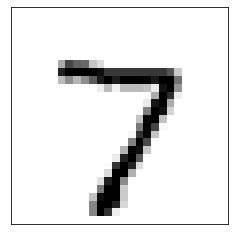

In [0]:
plt.xticks([])
plt.yticks([])
plt.imshow(test_images[0], cmap=plt.cm.binary)

# Stay in touch

- Twitter https://twitter.com/tensorflow
- Blog http://blog.tensorflow.org/
- YouTube https://www.youtube.com/tensorflow.

Thank you!

# Learning more

Book recommendations
* [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python)
* [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)   
  [ملخص لبعض فصول الكتاب بالعربية](http://ru0sa.com/?page_id=185)
